<a href="https://colab.research.google.com/github/DouglasAVS/Teste/blob/main/OverFavorito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports
Nesse ciclo o objetivo é entender o problema , entender os dados e rodar o primeiro modelo.

In [1]:
# Bibliotecas default
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Importação de 9 Classificadores
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron

#2.0. Loading Data





In [136]:
data1 = pd.read_csv('/content/BRA.csv')
data2 = pd.read_csv('/content/BRA.csv')
#dataUSA = pd.read_csv('/content/USA.csv')

data = pd.concat([data1,data2])

In [137]:
data.shape

(7600, 19)

In [138]:

data.rename(columns={'FTR': 'Res'}, inplace = True)
data.rename(columns={'HomeTeam': 'Home'}, inplace = True)
data.rename(columns={'AwayTeam': 'Away'}, inplace = True)
data.rename(columns={'FTHG': 'HG'}, inplace = True)
data.rename(columns={'FTAG': 'AG'}, inplace = True)
data.rename(columns={'B365H': 'PH'}, inplace = True)
data.rename(columns={'B365A': 'PA'}, inplace = True)
data.rename(columns={'B365D': 'PD'}, inplace = True)

data.rename(columns={'B365>2.5': 'ODD_Over'}, inplace = True)
data.rename(columns={'B365<2.5': 'ODD_Under'}, inplace = True)

data.rename(columns={'Season': 'Temporada'}, inplace = True)



data.tail(10)

,Country,League,Temporada,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
3790,Brazil,Serie A,2021,10/12/2021,00:30,America MG,Sao Paulo,2.0,0.0,H,1.94,3.47,4.30,2.12,3.64,4.40,1.98,3.29,4.02
3791,Brazil,Serie A,2021,10/12/2021,00:30,Atletico GO,Flamengo RJ,2.0,0.0,H,1.72,4.12,4.70,1.80,4.12,4.90,1.73,3.87,4.49
3792,Brazil,Serie A,2021,10/12/2021,00:30,Bragantino,Internacional,1.0,0.0,H,1.88,3.72,4.28,2.05,4.05,4.30,1.89,3.61,3.95
3793,Brazil,Serie A,2021,10/12/2021,00:30,Fluminense,Chapecoense-SC,3.0,0.0,H,1.19,6.94,16.79,1.21,7.50,17.00,1.19,6.70,15.66
3794,Brazil,Serie A,2021,10/12/2021,00:30,Fortaleza,Bahia,2.0,1.0,H,2.54,3.27,3.00,2.70,3.38,3.11,2.45,3.20,2.94
3795,Brazil,Serie A,2021,10/12/2021,00:30,Gremio,Atletico-MG,4.0,3.0,H,1.54,4.57,5.91,1.58,4.60,6.21,1.52,4.33,5.77
3796,Brazil,Serie A,2021,10/12/2021,00:30,Juventude,Corinthians,1.0,0.0,H,2.33,3.11,3.55,2.37,3.20,3.70,2.25,3.06,3.46
3797,Brazil,Serie A,2021,10/12/2021,00:30,Palmeiras,Ceara,1.0,0.0,H,4.21,3.84,1.86,4.23,3.95,1.95,4.00,3.73,1.85
3798,Brazil,Serie A,2021,10/12/2021,00:30,Santos,Cuiaba,1.0,1.0,D,2.11,3.04,4.33,2.14,3.24,4.45,2.07,3.01,4.09
3799,Brazil,Serie A,2021,10/12/2021,00:30,Sport Recife,Athletico-PR,1.0,1.0,D,1.75,3.64,5.28,1.75,3.76,5.60,1.71,3.57,5.19


#3.0. Data Preparation

Essa seção tem o objetivo de preparar os dados.

In [139]:
# Excluir colunas 

data=data.drop(['League','Time','MaxH','MaxD','MaxA','AvgH','AvgD','AvgA','Country','Date'],1)

data=data.drop(['Res'],1)

#data["Res"] = data["Res"].map({"H":0,"A":1,"D":2})

data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,Temporada,Home,Away,HG,AG,PH,PD,PA
0,2012,Palmeiras,Portuguesa,1.0,1.0,1.75,3.86,5.25
1,2012,Sport Recife,Flamengo RJ,1.0,1.0,2.83,3.39,2.68
2,2012,Figueirense,Nautico,2.0,1.0,1.60,4.04,6.72
3,2012,Botafogo RJ,Sao Paulo,4.0,2.0,2.49,3.35,3.15
4,2012,Corinthians,Fluminense,0.0,1.0,1.96,3.53,4.41


In [140]:
#Criando a Variavel Alvo

data['Gols_T'] = data['HG'] + data['AG']

conditionlist = [
    (data['Gols_T'] > 2),
     (data['Gols_T'] <=2)]
choicelist = ['Over','Under']
data['Over25'] = np.select(conditionlist, choicelist, default='Under')

data["Over25"] = data["Over25"].map({"Over":1,"Under":0})

data=data.drop(['Gols_T'],1)

data.dropna(inplace = True)


data.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,Temporada,Home,Away,HG,AG,PH,PD,PA,Over25
3795,2021,Gremio,Atletico-MG,4.0,3.0,1.54,4.57,5.91,1
3796,2021,Juventude,Corinthians,1.0,0.0,2.33,3.11,3.55,0
3797,2021,Palmeiras,Ceara,1.0,0.0,4.21,3.84,1.86,0
3798,2021,Santos,Cuiaba,1.0,1.0,2.11,3.04,4.33,0
3799,2021,Sport Recife,Athletico-PR,1.0,1.0,1.75,3.64,5.28,0


In [142]:
# Criando Colunas 

data['Med_G_C'] = data.groupby('Home')['HG'].transform(lambda x: x.rolling(10, 5).mean())
data['Med_G_F'] = data.groupby('Away')['AG'].transform(lambda x: x.rolling(10, 5).mean())
data['DP_G_C'] = data.groupby('Home')['HG'].transform(lambda x: x.rolling(10, 5).std())
data['DP_G_F'] = data.groupby('Away')['AG'].transform(lambda x: x.rolling(10, 5).std())


data['Casa_CV'] = (data['DP_G_C'] ) / (data['Med_G_C'])  
data['Fora_CV'] =(data['DP_G_F']) / (data['Med_G_F'] )
data['Med_T'] = (data['Med_G_C'] + data['Med_G_F']) / 2
data['Total_CV'] = (data['Casa_CV'] + data['Fora_CV']) /2 

data=data.drop(['HG','AG','DP_G_C','DP_G_F','Med_G_C','Med_G_F','Casa_CV','Fora_CV'],1)

data.Med_T=data.Med_T.round(2)

data.Total_CV=data.Total_CV.round(3)

conditionlist = [
    (data['Total_CV'] <= 0.90),
     (data['Total_CV']> 90)]
choicelist = ['Over','Under']
data['I_Over25'] = np.select(conditionlist, choicelist, default='Under')

data["I_Over25"] = data["I_Over25"].map({"Over":1,"Under":0})

data.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Temporada,Home,Away,PH,PD,PA,Over25,Med_T,Total_CV,I_Over25
3795,2021,Gremio,Atletico-MG,1.54,4.57,5.91,1,1.85,0.595,1
3796,2021,Juventude,Corinthians,2.33,3.11,3.55,0,0.90,0.986,0
3797,2021,Palmeiras,Ceara,4.21,3.84,1.86,0,1.30,0.913,0
3798,2021,Santos,Cuiaba,2.11,3.04,4.33,0,0.90,1.046,0
3799,2021,Sport Recife,Athletico-PR,1.75,3.64,5.28,0,0.90,1.040,0


In [169]:
matches = data.shape[0]

features = data.shape[1] -1 #Retirando a coluna Resultado

Jogos_Over = len(data[data.Over25==1])
Jogos_Under = len(data[data.Over25==0])

val=[Jogos_Over,Jogos_Under]

win_rate = (float(Jogos_Over)/(matches)) *100

print ('Total de jogos: ', matches)
print ('Total de colunas: ', features)
print ('Total de jogos com mais de 2 gols: ', Jogos_Over)
print ('Total de jogos com menos de 2 gols: ', Jogos_Under)
print ('Percentual de jogos com mais de 2 gols: {:.2f}%'.format( win_rate ))

Total de jogos:  7378
Total de colunas:  9
Total de jogos com mais de 2 gols:  3128
Total de jogos com menos de 2 gols:  4250
Percentual de jogos com mais de 2 gols: 42.40%


In [170]:
dataCasa = data.loc[(data['PH'] <= 1.70) ]
dataCasa = dataCasa.loc[(dataCasa['Med_T'] >= 1.25)]


dataCasa = dataCasa.loc[(dataCasa['Total_CV'] <=0.90)]

matches = dataCasa.shape[0]

features = dataCasa.shape[1] -1 #Retirando a coluna Resultado

Jogos_Over = len(dataCasa[dataCasa.Over25==1])
Jogos_Under = len(dataCasa[dataCasa.Over25==0])

val=[Jogos_Over,Jogos_Under]

win_rate = (float(Jogos_Over)/(matches)) *100

print ('Total de jogos: ', matches)
print ('Total de colunas: ', features)
print ('Total de jogos com mais de 2 gols: ', Jogos_Over)
print ('Total de jogos com 2 gols ou menos: ', Jogos_Under)
print ('Percentual de jogos ganhos em casa: {:.2f}%'.format( win_rate ))

Total de jogos:  707
Total de colunas:  9
Total de jogos com mais de 2 gols:  459
Total de jogos com 2 gols ou menos:  248
Percentual de jogos ganhos em casa: 64.92%


In [144]:
dataCasa.tail(20)

,Temporada,Home,Away,PH,PD,PA,Over25,Med_T,Total_CV,I_Over25
3539,2021,Atletico-MG,Bahia,1.66,3.87,5.69,1,1.65,0.772,1
3540,2021,Flamengo RJ,Sao Paulo,1.65,3.84,5.83,1,1.35,0.900,1
3550,2021,Atletico-MG,Athletico-PR,1.69,3.66,5.78,0,1.70,0.740,1
3564,2021,Flamengo RJ,Internacional,1.46,4.40,7.91,1,1.60,0.772,1
3580,2021,Palmeiras,Cuiaba,1.46,4.30,8.22,0,1.35,0.898,1
3590,2021,Palmeiras,Athletico-PR,1.64,3.98,5.65,1,1.50,0.885,1
3605,2021,Bragantino,Chapecoense-SC,1.62,3.88,6.16,1,1.30,0.659,1
3615,2021,Atletico-MG,Sport Recife,1.26,5.81,14.31,1,1.25,0.882,1
3637,2021,Atletico-MG,Internacional,1.60,3.89,6.41,0,1.60,0.776,1
3664,2021,Atletico-MG,Santos,1.47,4.36,7.68,1,1.65,0.611,1


In [151]:
data.corr()

,Temporada,PH,PD,PA,Over25,Med_T,Total_CV,I_Over25
Temporada,1.000000,0.131695,-0.084338,-0.003659,-0.025953,-0.048242,-0.028189,0.062733
PH,0.131695,1.000000,-0.322886,-0.655153,-0.051340,-0.110427,-0.025673,0.015056
PD,-0.084338,-0.322886,1.000000,0.851153,0.105004,0.198700,-0.031545,0.025197
PA,-0.003659,-0.655153,0.851153,1.000000,0.067643,0.105341,0.046131,-0.028651
Over25,-0.025953,-0.051340,0.105004,0.067643,1.000000,0.292821,-0.186204,0.157838
Med_T,-0.048242,-0.110427,0.198700,0.105341,0.292821,1.000000,-0.605341,0.500124
Total_CV,-0.028189,-0.025673,-0.031545,0.046131,-0.186204,-0.605341,1.000000,-0.758751
I_Over25,0.062733,0.015056,0.025197,-0.028651,0.157838,0.500124,-0.758751,1.000000


In [79]:
dataunder = data.loc[(data['PH'] >= 2) & (data['PA'] >= 2)]
dataunder = dataunder.loc[(dataunder['Med_T'] <= 1)]


dataunder = dataunder.loc[(dataunder['Total_CV'] > 1.20)]

matches = dataunder.shape[0]

features = dataunder.shape[1] -1 #Retirando a coluna Resultado

Jogos_Over = len(dataunder[dataunder.Over25==1])
Jogos_Under = len(dataunder[dataunder.Over25==0])

val=[Jogos_Over,Jogos_Under]

win_rate = (float(Jogos_Under)/(matches)) *100

print ('Total de jogos: ', matches)
print ('Total de colunas: ', features)
print ('Total de jogos com mais de 2 gols: ', Jogos_Over)
print ('Total de jogos com 2 gols ou menos: ', Jogos_Under)
print ('Percentual de jogos ganhos em casa: {:.2f}%'.format( win_rate ))

Total de jogos:  317
Total de colunas:  8
Total de jogos com mais de 2 gols:  74
Total de jogos com 2 gols ou menos:  243
Percentual de jogos ganhos em casa: 76.66%


In [ ]:
#mean_df = dataacertosunder['ODD_Under'].mean()
#print(mean_df)

In [153]:
data.dropna(inplace = True)
data.tail()

,Temporada,Home,Away,PH,PD,PA,Over25,Med_T,Total_CV,I_Over25
3795,2021,Gremio,Atletico-MG,1.54,4.57,5.91,1,1.85,0.595,1
3796,2021,Juventude,Corinthians,2.33,3.11,3.55,0,0.90,0.986,0
3797,2021,Palmeiras,Ceara,4.21,3.84,1.86,0,1.30,0.913,0
3798,2021,Santos,Cuiaba,2.11,3.04,4.33,0,0.90,1.046,0
3799,2021,Sport Recife,Athletico-PR,1.75,3.64,5.28,0,0.90,1.040,0


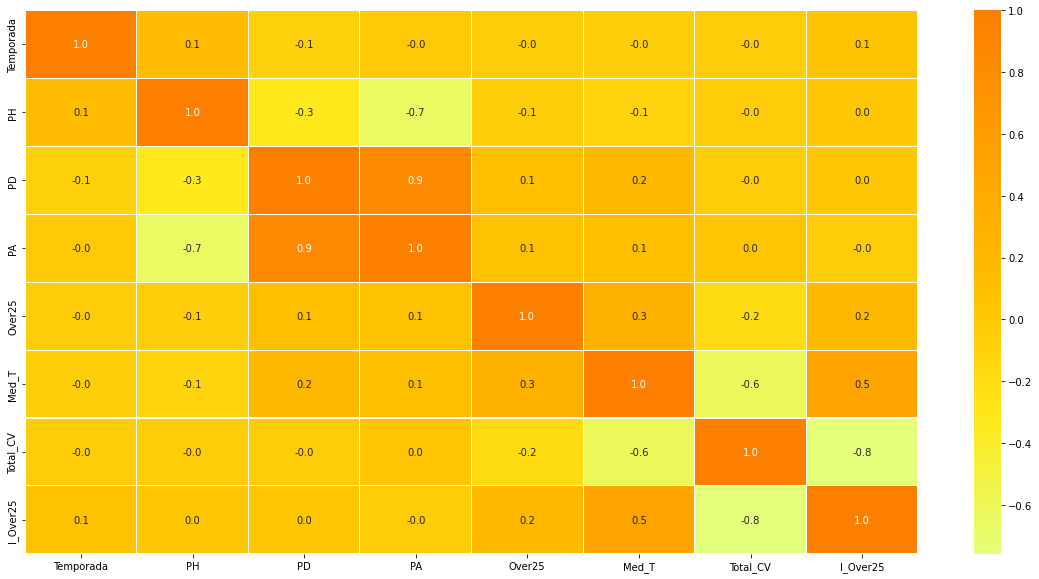

In [152]:
f,ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), cmap ='Wistia', annot=True, linewidths=.09, fmt= '.1f',ax=ax)
plt.show()

In [189]:
# Take the fields of interest and plug them into variable X
X = data[['I_Over25']]
# Make sure to provide the corresponding truth value
y = data['Over25'].values.tolist()
  
# Split the data into test and training (30% for test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [190]:
features = data.drop(['Med_T','Temporada','Home','Away','Over25','PH','PD','PA','Total_CV'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [191]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)
 
print ('Features: ',features_scale.shape)
print (features_scale)

Features:  (7378, 1)
[[1.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


In [ ]:
#67,39% clf = SVC()
#68,60% clf = LogisticRegression()
#71,83% clf = DecisionTreeClassifier()
#72,32% clf = KNeighborsClassifier()
# Ate agora o melhor #72,53% clf = MLPClassifier()
#73,76% clf = RandomForestClassifier()
#75,19% clf = GradientBoostingClassifier()
#74,55% clf = XGBClassifier()
#75,40% clf = LGBMClassifier()
#clf =Perceptron()

In [192]:
clf = LogisticRegression()
clf


LogisticRegression()

In [193]:
# Train the classifier using the train data
clf = clf.fit(X_train,y_train)

In [194]:
# Validate the classifier
accuracy = clf.score(X_test, y_test)
print('Accuracy: ' + str(accuracy))
# Make a confusion matrix
prediction = clf.predict(X_test)
 
cm = confusion_matrix(prediction, y_test)
cr = classification_report(prediction, y_test)
print(cm)
print(cr)

Accuracy: 0.5885275519421861
[[738 363]
 [548 565]]
              precision    recall  f1-score   support

           0       0.57      0.67      0.62      1101
           1       0.61      0.51      0.55      1113

    accuracy                           0.59      2214
   macro avg       0.59      0.59      0.59      2214
weighted avg       0.59      0.59      0.59      2214



In [195]:
data.shape

(7378, 10)

In [196]:
previsao=features_scale[3000:]
  
Casa_full=data['Home']
Casa=Casa_full[3000:]
 
Visitante_full=data['Away']
Visitante=Visitante_full[3000:]
 
res_full=data["Over25"]
res=res_full[3000:]

var_full=data["I_Over25"]
var=var_full[3000:]

pred=clf.predict(previsao)
 
df=pd.DataFrame({'Mandante':Casa,'Visitante':Visitante,'Prognóstico':pred,'Resultado':res,'Variancia':var})
 
df.head(20)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


,Mandante,Visitante,Prognóstico,Resultado,Variancia
3203,Botafogo RJ,Goias,1,0,1
3204,Vasco,Corinthians,1,1,1
3205,Bragantino,Goias,1,0,1
3206,Ceara,Coritiba,0,1,0
3207,Atletico-MG,Sport Recife,0,0,0
3208,Atletico GO,Palmeiras,1,1,1
3209,Fluminense,Santos,1,1,1
3210,Athletico-PR,Gremio,1,1,1
3211,Internacional,Flamengo RJ,1,1,1
3212,Botafogo RJ,Ceara,1,1,1


print(df.groupby(by=['Fruit','Date']).sum().groupby(level=[0]).cumsum())